<a href="https://colab.research.google.com/github/cheungngo/computational_physics/blob/main/03_02_04_Models_of_Friction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models of Friction

1. **Static Friction ($ F_{\text{static}} $)**:
   - This is the force of friction that keeps an object at rest. It opposes the force trying to move the object.
   - It is not a constant value but varies between 0 and a maximum value. The maximum value is given by $ F_{\text{max}} = \mu_s N $, where $ \mu_s $ is the coefficient of static friction and $ N $ is the normal force (perpendicular force between the two surfaces).
   - The equation $ f \leq -\mu_s N $ indicates that the actual static frictional force can be anywhere from 0 up to $ \mu_s N $, and it will adjust itself to be exactly what's needed to prevent motion. The negative sign indicates the force opposes the motion.

2. **Kinetic Friction ($ F_{\text{kinetic}} $)**:
   - Once an object starts moving, it experiences kinetic (or sliding) friction, which is generally less than the maximum static friction.
   - The force of kinetic friction is given by $ f = -\mu_k N \frac{v}{|v|} $. Here, $ \mu_k $ is the coefficient of kinetic friction, $ N $ is the normal force, and $ \frac{v}{|v|} $ is a term that ensures the frictional force opposes the direction of motion (it gives the sign of the velocity).
   - This equation indicates that kinetic friction is constant in magnitude (determined by $ \mu_k $ and $ N $) and always opposes the direction of motion.

3. **Viscous Friction ($ F_{\text{viscous}} $)**:
   - This type of friction is not due to solid surfaces in contact but due to a viscous fluid (like air or water) opposing the motion of an object moving through it.
   - The force of viscous friction is proportional to the velocity of the object and is given by $ f = -bv $, where $ b $ is a constant that depends on the properties of the fluid and the shape and size of the object, and $ v $ is the velocity of the object.
   - The negative sign indicates the force always opposes the motion. The larger the velocity, the larger the viscous frictional force.

# 1D simple harmonic oscillator with Static Friction

To incorporate static friction into the equation of motion for a 1D simple harmonic oscillator, we can consider the force exerted by static friction, $ F_{\text{static}} $. As mentioned earlier, the static frictional force is variable and opposes the direction of motion up to a maximum value.

In this case, let's define the maximum static frictional force as:

$ F_{\text{max}} = \mu_s N $

Where:
- $ \mu_s $ is the coefficient of static friction.
- $ N $ is the normal force, which for simplicity we'll assume is equal to the gravitational force $ mg $.

For an object on a horizontal plane with no external vertical forces, $ N = mg $.

The differential equation then becomes:

$ m\frac{d^2 x}{dt^2} + kx = F_{\text{static}} $

Given that $ F_{\text{static}} $ changes sign and magnitude depending on the direction and tendency of motion, it introduces nonlinearity to the system. For simplicity, we can use the following model:

- If the object is at rest (velocity = 0) and the restoring force due to the spring is less than the maximum static friction, $ F_{\text{static}} $ will equal the spring force to prevent motion.
- If the restoring force exceeds the maximum static friction, the object will move and $ F_{\text{static}} $ will be $ \mu_s N $ in the direction opposing motion.



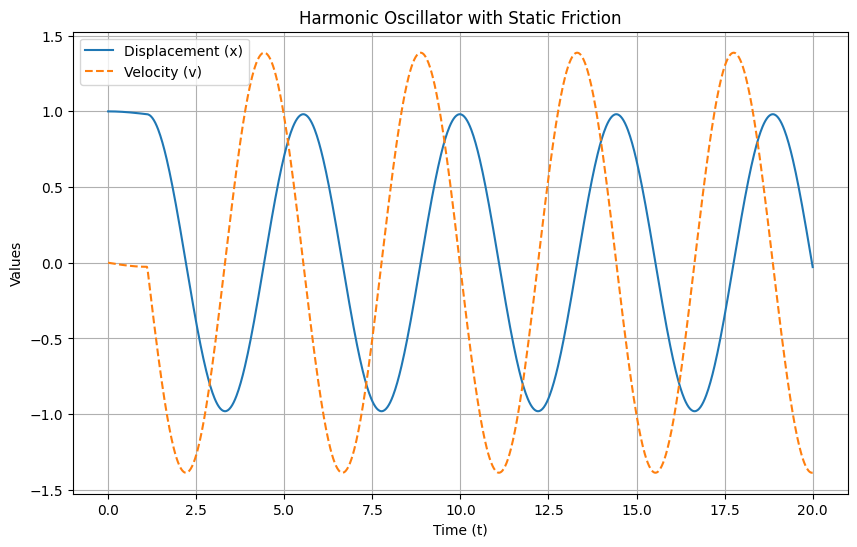

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of ODEs
def harmonic_oscillator_with_static_friction(t, y, m, k, mu_s, g):
    x, v = y
    N = m * g  # normal force
    F_max_static = mu_s * N  # maximum static frictional force

    # Check the conditions for static friction
    if v == 0 and np.abs(k * x) <= F_max_static:
        F_static = k * x  # friction opposes the spring force and prevents motion
    elif np.abs(k * x) > F_max_static:
        F_static = -F_max_static if v > 0 else F_max_static  # direction opposes motion
    else:
        F_static = 0

    dxdt = v
    dvdt = (-k * x + F_static) / m

    return [dxdt, dvdt]

# Parameters
m = 1.0  # mass
k = 2.0  # spring constant
mu_s = 0.2  # coefficient of static friction
g = 9.81  # gravitational acceleration

# Initial conditions
x0 = 1.0  # initial displacement
v0 = 0.0  # initial velocity

# Time array
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Solve the system of ODEs
solution = solve_ivp(
    harmonic_oscillator_with_static_friction, t_span, [x0, v0],
    args=(m, k, mu_s, g), t_eval=t_eval, rtol=1e-6, atol=1e-8
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Displacement (x)')
plt.plot(solution.t, solution.y[1], label='Velocity (v)', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Harmonic Oscillator with Static Friction')
plt.legend()
plt.grid(True)
plt.show()


## The amplitude of oscillation does not reduce over time

The plot indeed shows that the amplitude of the displacement does not decrease over time, contrary to what one might expect with the inclusion of static friction.

The reason for this behavior lies in the way static friction has been modeled in this case. In the numerical model, static friction only acts to prevent motion when the system is at rest and the restoring force is less than the maximum static friction force. Once the motion begins, and the restoring force exceeds the threshold of static friction, the object continues to oscillate without a reduction in amplitude.

In this particular model, static friction is acting more like a threshold that must be overcome to initiate motion, rather than a dissipative force that continually acts to reduce the energy of the system.

For a more realistic behavior where the amplitude gradually decreases, kinetic friction (which continually opposes motion) might be a more suitable model, or a combination of static and kinetic friction that transitions as the object begins to move.

## The value of mu_s for the system to stop

consider t=0, when x0 = 1 and v0 = 0,

$ m\frac{d^2 x}{dt^2} = 0 $

so that $ kx = F_{\text{static}} = \mu_s N $

The threshold for the system to stop would then be:

In [15]:
k * x0 / (m * g)

0.2038735983690112

# 1D Simple Harmonic Oscillator with Kinetic Friction

Let's consider the 1D harmonic oscillator with kinetic friction instead of static friction. The kinetic frictional force can be represented as:

$ f = -\mu_k N \frac{v}{|v|} $

Where:
- $ \mu_k $ is the coefficient of kinetic friction.
- $ N $ is the normal force, equal to the gravitational force $ mg $.
- $ \frac{v}{|v|} $ is a term that ensures the frictional force opposes the direction of motion.

The differential equation for the harmonic oscillator with kinetic friction becomes:

$ m\frac{d^2 x}{dt^2} + kx = f $

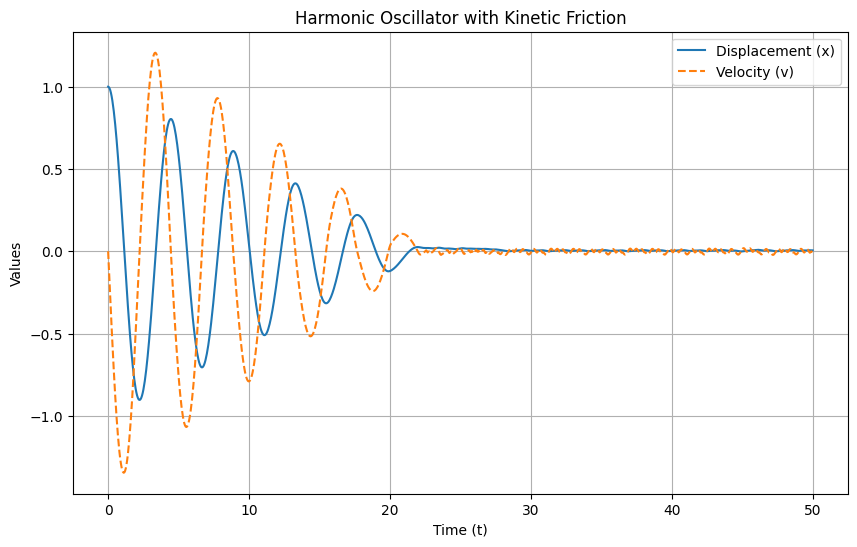

In [19]:
# Redefining parameters and functions

# Parameters
m = 1.0  # mass
k = 2.0  # spring constant
mu_k = 0.01  # coefficient of kinetic friction
g = 9.81  # gravitational acceleration

# Initial conditions
x0 = 1.0  # initial displacement
v0 = 0.0  # initial velocity

# Time array
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Define the system of ODEs with kinetic friction
def harmonic_oscillator_with_kinetic_friction(t, y, m, k, mu_k, g):
    x, v = y
    N = m * g  # normal force
    F_kinetic = -mu_k * N * np.sign(v)  # kinetic frictional force, direction opposes motion

    dxdt = v
    dvdt = (-k * x + F_kinetic) / m

    return [dxdt, dvdt]

# Solve the system of ODEs with kinetic friction
solution_kinetic = solve_ivp(
    harmonic_oscillator_with_kinetic_friction, t_span, [x0, v0],
    args=(m, k, mu_k, g), t_eval=t_eval, rtol=1e-3, atol=1e-3
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(solution_kinetic.t, solution_kinetic.y[0], label='Displacement (x)')
plt.plot(solution_kinetic.t, solution_kinetic.y[1], label='Velocity (v)', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Harmonic Oscillator with Kinetic Friction')
plt.legend()
plt.grid(True)
plt.show()


The plot above represents the behavior of a simple harmonic oscillator with kinetic friction. Here's what we observe:

1. **Displacement (x)**:
   - The object starts with an initial displacement and oscillates back and forth.
   - Unlike the case with static friction, the kinetic friction acts continuously to oppose the motion, leading to a gradual reduction in the amplitude of the oscillations over time.
   - As the kinetic friction continuously removes energy from the system, the oscillations eventually decay, and the object comes to rest.

2. **Velocity (v)**:
   - The velocity plot (dashed line) shows how the object's velocity changes as it oscillates. The kinetic frictional force causes the velocity to decrease more rapidly, leading to quicker damping.

The inclusion of kinetic friction in the simple harmonic oscillator provides a more realistic depiction of physical systems where motion is opposed by a continuous frictional force. In this case, the kinetic friction leads to a gradual decay of the oscillations, eventually bringing the system to rest.

# 1D simple Harmonic Oscillator with Viscous Friction

Now we'll consider a simple harmonic oscillator with viscous friction. Viscous friction is often used to model damping in oscillatory systems, where the damping force is proportional to the velocity of the object.

The differential equation for the simple harmonic oscillator with viscous friction is:

$ m\frac{d^2 x}{dt^2} + kx + f = 0 $

where the viscous frictional force is given by:

$ f = -bv $

Here, $ b $ is the coefficient of viscous friction, and $ v $ is the velocity of the object.



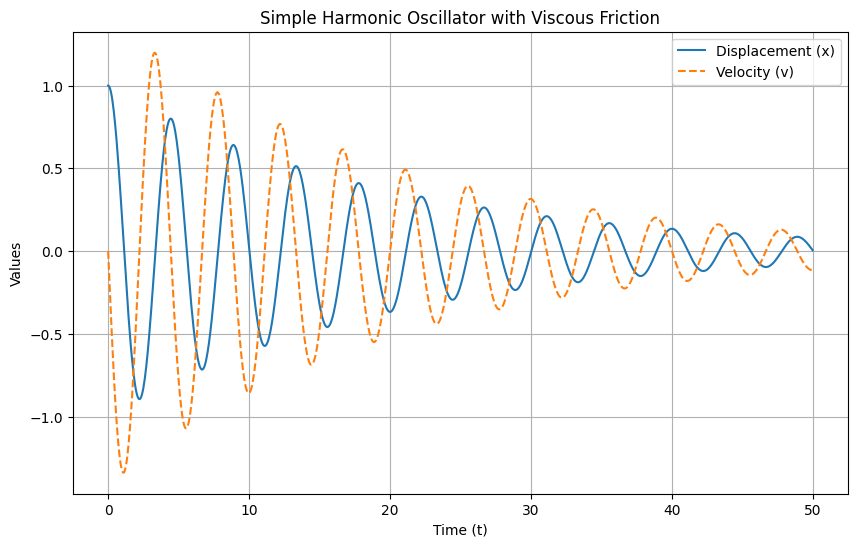

In [20]:
# Parameters
m = 1.0  # mass
k = 2.0  # spring constant

# Initial conditions
x0 = 1.0  # initial displacement
v0 = 0.0  # initial velocity

# Time array
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Define the system of ODEs with viscous friction for a simple harmonic oscillator
def simple_harmonic_oscillator_with_viscous_friction(t, y, m, k, b):
    x, v = y
    F_viscous = -b * v  # viscous frictional force, direction opposes motion

    dxdt = v
    dvdt = (-k * x + F_viscous) / m

    return [dxdt, dvdt]

# Parameters for viscous friction
b_simple = 0.1  # coefficient of viscous friction

# Solve the system of ODEs with viscous friction for a simple harmonic oscillator
solution_viscous_simple = solve_ivp(
    simple_harmonic_oscillator_with_viscous_friction, t_span, [x0, v0],
    args=(m, k, b_simple), t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(solution_viscous_simple.t, solution_viscous_simple.y[0], label='Displacement (x)')
plt.plot(solution_viscous_simple.t, solution_viscous_simple.y[1], label='Velocity (v)', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Simple Harmonic Oscillator with Viscous Friction')
plt.legend()
plt.grid(True)
plt.show()


The plot above represents the behavior of a simple harmonic oscillator with viscous friction. Here's what we observe:

1. **Displacement (x)**:
   - The object starts with an initial displacement and begins to oscillate.
   - The viscous friction acts continuously to oppose the motion, leading to a gradual reduction in the amplitude of the oscillations over time.
   - The damping effect of viscous friction eventually brings the system to rest at its equilibrium position.

2. **Velocity (v)**:
   - The velocity plot (dashed line) shows how the object's velocity changes as it oscillates. The viscous frictional force causes the velocity to decrease more rapidly, leading to quicker damping.

The inclusion of viscous friction in the simple harmonic oscillator provides a realistic depiction of physical systems where a damping force is proportional to velocity. It leads to a gradual decay of the oscillations, eventually bringing the system to rest.

In many physical systems, viscous damping is a common model for energy dissipation, especially when the object is moving through a medium like air or liquid. The coefficient $ b $ determines the rate of energy loss, and by adjusting it, one can simulate different damping behaviors.

## Differences between the plots for viscous and kinetic friction

We can see that the motion continues for the model with viscous friction for a much longer time, while that for the kinetic friction stops very early, holding all other constants the same.  This is because the frictional force -bv reduces as time goes, while the kinetic friction being the same throughout the motion.

## The critical value for the model with viscous friction

The differential equation for the simple harmonic oscillator with viscous friction is:

$ m\frac{d^2 x}{dt^2} + b\frac{dx}{dt} + kx = 0 $

We can rearrange the equation such that:

$ m r^2 + br + k = 0 $

and the discriminant for the equation would thus be:

$ b^2 - 4mk $

solving $ b^2 - 4mk = 0 $ :

In [32]:
# Importing necessary functions
from sympy import symbols, Eq, solve

# Redefine symbols and constants
m, b, k = symbols('m b k', real=True, positive=True)

# Discriminant of the characteristic equation
D = b**2 - 4 * k * m

# Solve for the condition D = 0 (critical damping)
critical_damping_condition = Eq(D, 0)
critical_b_value = solve(critical_damping_condition, b)
critical_b_value


[2*sqrt(k)*sqrt(m)]

The critical value would be $ 2 \sqrt k \sqrt m $

as $ \omega_0 = \sqrt (k/m) $, by substitution,

The critical value could be expressed as $ 2m \omega_0 $

This value of b ensures that the characteristic roots are real and equal, leading to a critically damped response where the system returns to equilibrium as quickly as possible without oscillating.

Below would be the oscillations for the three cases of b

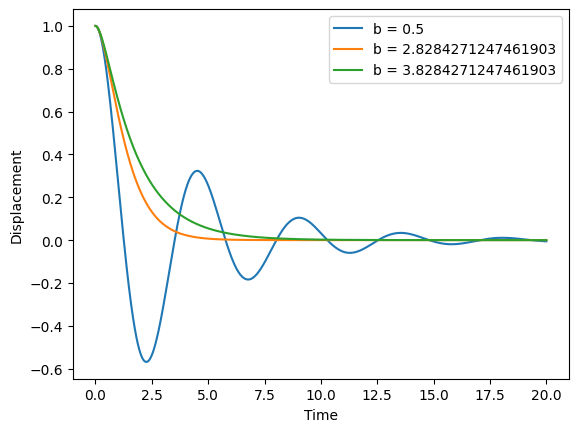

In [37]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # mass
k = 2.0  # spring constant

# Critical damping coefficient
b_critical = 2 * np.sqrt(m * k)

# Initial conditions
x0 = 1.0  # initial displacement
v0 = 0.0  # initial velocity

# Time array
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Define the system of ODEs with viscous friction for a simple harmonic oscillator
def simple_harmonic_oscillator_with_viscous_friction(t, y, m, k, b):
    x, v = y
    F_viscous = -b * v  # viscous frictional force, direction opposes motion

    dxdt = v
    dvdt = (-k * x + F_viscous) / m

    return [dxdt, dvdt]

# Damping coefficients for different cases
b_values = [0.5 , b_critical, b_critical + 1]

# Solve and plot for each case
for b in b_values:
    solution = solve_ivp(
        simple_harmonic_oscillator_with_viscous_friction, t_span, [x0, v0],
        args=(m, k, b), t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
    )
    plt.plot(t_eval, solution.y[0], label=f'b = {b}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.show()


Here are the conditions that categorize the system's behavior:

1. **Underdamping ($ b < 2m\omega_0 $):**
   - Condition: $ b < 2\sqrt{k}\sqrt{m} $
   - The system oscillates with a decreasing amplitude over time.

2. **Critical Damping ($ b = 2m\omega_0 $):**
   - Condition: $ b = 2\sqrt{k}\sqrt{m} $
   - The system returns to equilibrium as quickly as possible without oscillating.

3. **Overdamping ($ b > 2m\omega_0 $):**
   - Condition: $ b > 2\sqrt{k}\sqrt{m} $
   - The system returns to equilibrium without oscillating but more slowly than in the critically damped case.